# Project: Crawling News Articles about Siri during WWDC2025

## Introduction

* **Background**: 

In June 2024, Apple first showcased its AI-powered Siri features during WWDC. However, in March 2025, Apple publicly announced a delay, indicating that these features would not be ready for the initial iOS 18 release. Reports suggested that Apple was now targeting a Spring 2026 timeframe for the rollout of these delayed capabilities. As a result, both the general public and tech enthusiasts were anticipating new information and updates on Siri during WWDC 2025.

The main announcements at the event included AI-powered features such as live translation in calls and messages, a new user interface described as "liquid glass," enhancements to the iPad to make it more similar to macOS, revamped Phone and Camera apps, and new Apple Intelligence features across devices. Given my keen interest in AI-powered Siri, my aim is to scrap news articles published during WWDC 2025 on Google News from June 9 to June 13, 2025 to analyze the general public's reaction towards Siri

* **Aim**: Analyze public reactions to Siri following the announcements made at WWDC 2025.

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import time
import re

driver_path = "/usr/local/bin/chromedriver" #output of "which chromedriver"
# 1. ChromeDriver Setup
service = Service(driver_path)  # Modifying the path to suit the local environment
options = Options()
options.add_argument("--start-maximized")
options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 Chrome/120 Safari/537.36")

driver = webdriver.Chrome(service=service, options=options)

# Siri related news during WWDC2025 
url = "https://www.google.com/search?q=wwdc+siri&tbs=cdr%3A1%2Ccd_min%3A6%2F10%2F2025%2Ccd_max%3A6%2F14%2F2025&tbm=nws"

driver.get(url)
time.sleep(10)


In [2]:
news_data = []

while True:
    # Find the news items (using CSS selectors, adjust as needed)
    news_items = driver.find_elements(By.CSS_SELECTOR, "div.SoaBEf") #div.SoaBEf
    # Extract data from each item
    for item in news_items:
        try:
            # Extract headline
            headline = item.find_element(By.CSS_SELECTOR, "div.n0jPhd.ynAwRc.MBeuO.nDgy9d").text #n0jPhd ynAwRc MBeuO nDgy9d

            # Extract source (adjust selector if needed)
            source = item.find_element(By.CSS_SELECTOR, "div.MgUUmf.NUnG9d").text

            # Extract snippet (adjust selector if needed)
            intro = item.find_element(By.CSS_SELECTOR, "div.GI74Re.nDgy9d").text

            news_data.append({
                "headline": headline,
                "source": source,
                "intro": intro
            })
        except Exception as e:
            print(f"Error extracting data: {e}")
    try:
        next_button = driver.find_element(By.ID, "pnnext") 
        # next_button = driver.find_element(By.CSS_SELECTOR, "td.d6cvqb.BBwThe a")
        next_button.click()
        time.sleep(5)
    except Exception as e:
        print(f"Error: {e}")
        break
    
# 5. Converting the results into a DataFrame 
df = pd.DataFrame(news_data)

# 6. Saving into .csv
df.to_csv("siri_news.csv", index=False)

# Close the browser
driver.quit()


Error: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="pnnext"]"}
  (Session info: chrome=138.0.7204.93); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010ea5a728 chromedriver + 5891880
1   chromedriver                        0x000000010ea51e7a chromedriver + 5856890
2   chromedriver                        0x000000010e522400 chromedriver + 418816
3   chromedriver                        0x000000010e57422b chromedriver + 754219
4   chromedriver                        0x000000010e574441 chromedriver + 754753
5   chromedriver                        0x000000010e5c4cd4 chromedriver + 1084628
6   chromedriver                        0x000000010e59a50d chromedriver + 910605
7   chromedriver                        0x000000010e5c2073 chromedriver + 1073267
8   chromedriver                       

In [3]:
# Checkign the DataFrame (collected data)
df.head()

,headline,source,intro
0,Apple WWDC Interview: Craig Federighi and Joz ...,Tom's Guide,Apple Intelligence is still very much a work i...
1,"WWDC: Yes but Siri will get smart one day, but...",Apple Must,At the edge of WWDC 2025 Apple confessed that ...
2,Apple Says Personalized Siri Features Shown at...,MacRumors,Apple first announced the personalized Siri fe...
3,Apple Targets Spring 2026 for Release of Delay...,Bloomberg.com,Apple Inc. has set an internal release target ...
4,Apple might finally release Siri's AI upgrade ...,Pocket-lint,"At its recent WWDC 2025 keynote, Apple mention..."


In [4]:
# Number of articles scraped 
len(df)

98

In [5]:
# Checking to see if there's any missing results 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  98 non-null     object
 1   source    98 non-null     object
 2   intro     98 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


### English Morphemes Analysis

In [6]:
# Merging all headlines/intro into a string with ' ' 
headlines = (df['headline']+' ').sum() 
introductions = (df['intro']+' ').sum() 

full_list = []
full_list = (headlines+' '+introductions)

In [7]:
# reaction -> v,n, adj adv
import spacy

# Load the English Mode
nlp = spacy.load("en_core_web_sm")

# List of PoS 
target_pos = ["NOUN", "VERB", "ADJ", "ADV"]
no_verb_pos = ["NOUN", "ADJ", "ADV"]

# Function to extract morphemes 
def extract_morphemes(text, target_pos):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in target_pos and not token.is_stop]

In [8]:
# full PoS
full_list_pos = extract_morphemes(full_list, target_pos)
print(full_list_pos)

# without VERB 
without_verb_list = extract_morphemes(full_list, no_verb_pos)
print(without_verb_list)

['delay', 'new', 'feature', 'WWDC', 'smart', 'day', 'today', 'say', 'show', 'WWDC', 'year', 'real', 'work', 'delayed', 'finally', 'release', 'upgrade', 'ios', 'year', 'unmentionable', 'word', 'sum', 'battle', 'push', 'overhaul', 'initial', 'rebuild', 'faceplant', 'cost', 'big', 'upgrade', 'launch', 'date', 'hard', 'predict', 'upgrade', 'arrive', 'spring', 'executive', 'new', 'power', 'demoware', 'ready', 'ship', 'power', 'reportedly', 'new', 'target', 'date', 'stick', 'time', 'apple', 'unveil', 'new', 'look', 'wait', 'continue', 'WWDC', 'tell', 'future', 'infuse', 'spring', 'release', 'update', 'spring', 'unveil', 'software', 'revamp', 'plan', 'disappoint', 'debut', 'update', 'discuss', 'WWDC', 'delay', 'punt', 'update', 'struggle', 'race', 'WWDC', 'analyst', 'bullish', 'ready', 'glow', 'upgrade', 'set', 'stage', 'smart', 'admit', 'power', 'work', 'reliably', 'work', 'need', 'time', 'give', 'detailed', 'explanation', 'bungle', 'new', 'improve', 'delay', 'WWDC', 'live', 'translation', '

In [9]:
from collections import Counter

full_list_counter = Counter(full_list_pos)
full_list_most_common = full_list_counter.most_common(10)
print(full_list_most_common)

[('delay', 42), ('WWDC', 39), ('upgrade', 34), ('year', 30), ('new', 27), ('feature', 25), ('update', 21), ('release', 15), ('spring', 15), ('power', 14)]


In [33]:
stop_word = ['WWDC', 'day', 'say', 'show', 'year', 'ios', 'screenshot', 'interview',
    'video', 'date', 'time', 'word', 'sum', 'battle', 'analyst',
    'attempt', 'chatgpt', 'event', 'report', 'spring', 'feature',
    'plan', 'company', 'software', 'chief', 'marketing', 'head',
    'focus', 'statement', 'design', 'release', 'target', 'major',
    'announcement', 'key', 'audience', 'example', 'conference',
    'year', 'developer', 'introduction', 'tool', 'basic', 'feature',
    'talk', 'update', 'version', 'launch', 'presentation', 'statement',
    'expert', 'power', 'week', 'reportedly', 'apple', 'assistant', 
    'explanation', 'come', 'expect', 'take', 'suggest', 'speak', 'executive', 'new']

new_list = []
for w in full_list_pos:
    if w not in stop_word:
        new_list.append(w)

new_list_count = Counter(new_list)
new_list_count.most_common(10)
print(new_list_count)

Counter({'delay': 42, 'upgrade': 34, 'announce': 14, 'keynote': 14, 'confirm': 11, 'live': 9, 'explain': 9, 'promise': 9, 'intelligence': 8, 'overhaul': 7, 'arrive': 7, 'unveil': 7, 'reveal': 7, 'artificial': 7, 'debut': 6, 'claim': 6, 'mention': 6, 'smart': 5, 'work': 5, 'ship': 5, 'personalized': 5, 'personal': 5, 'long': 5, 'fall': 5, 'annual': 5, 'real': 4, 'delayed': 4, 'push': 4, 'big': 4, 'ready': 4, 'revamp': 4, 'struggle': 4, 'set': 4, 'need': 4, 'translation': 4, 'fail': 4, 'deliver': 4, 'deny': 4, 'product': 4, 'late': 4, 'siri': 4, 'know': 4, 'kick': 4, 'voice': 4, 'originally': 4, 'competitor': 4, 'showcase': 4, 'finally': 3, 'wait': 3, 'future': 3, 'accord': 3, 'tease': 3, 'go': 3, 'get': 3, 'fan': 3, 'miss': 3, 'exec': 3, 'highlight': 3, 'development': 3, 'enhance': 3, 'await': 3, 'include': 3, 'base': 3, 'advanced': 3, 'approach': 3, '-': 3, 'tech': 3, 'giant': 3, 'roll': 3, 'ago': 3, 'system': 3, 'today': 2, 'discuss': 2, 'race': 2, 'admit': 2, 'give': 2, 'detailed': 2

### Creating a WordCloud 

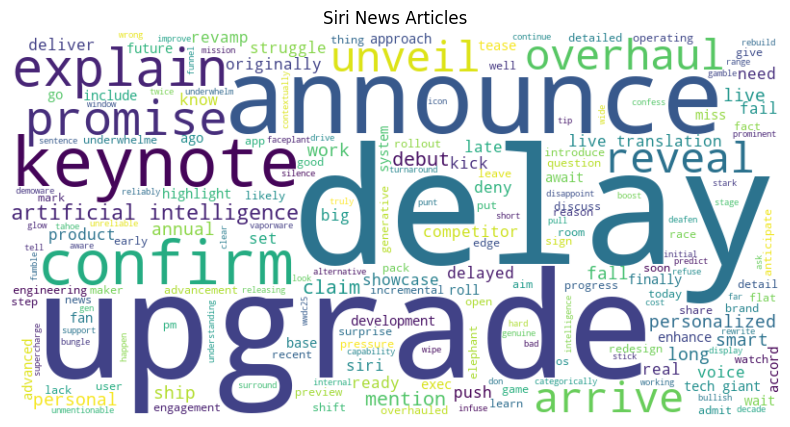

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wordcloud = ' '.join(new_list)
text_for_wordcloud

# Creating a WordCloud
wc = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud)

# Visualization
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Siri News Articles")
plt.show()


In [35]:
# What does 'power' imply in the review? 
print((df['intro'].loc[df['intro'].str.contains('power')]+"\n").sum())

# What does 'new' imply in the review? 
print((df['intro'].loc[df['intro'].str.contains('new')]+"\n").sum())



Apple has, for the first time, provided a more detailed explanation as to why the new AI-powered version of Siri that it teased last year has been delayed.
Apple is opening up about why your iPhone doesn't have a more personalized AI-powered Siri yet. It's a relatively rare example of the company speaking at...
Apple has confirmed that its advanced AI-powered Siri features will not launch until 2026. During WWDC 2025, Apple's Senior Vice President of Software...
After WWDC 2025, Apple spoke through why the company delayed its AI-powered Siri. It first teased what the tool would be able to do at WWDC 2024.
Apple's much-anticipated Siri upgrade is rumored to arrive in 'spring 2026'; A new report from Mark Gurman at Bloomberg claims Apple Intelligence-powered...
Tech News : Apple's software head, Craig Federighi, revealed that the much-awaited AI-powered Siri upgrades, showcased at WWDC 2024, are delayed until 2026.
The AI-powered, 'more personalized' Siri will not be available before 202

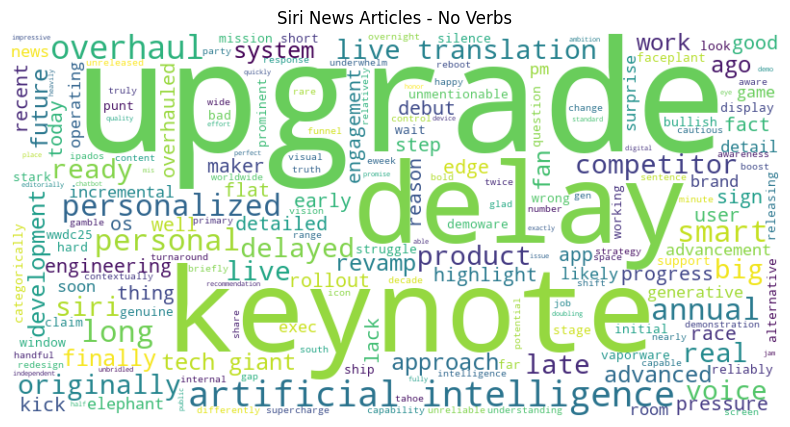

In [36]:
# No Verb WordCloud
no_verb_list = []
for w in without_verb_list:
    if w not in stop_word:
        no_verb_list.append(w)

no_verb_wordcloud = ' '.join(no_verb_list)
no_verb_wordcloud

# Creating a WordCloud
wc = WordCloud(width=800, height=400, background_color="white").generate(no_verb_wordcloud)

# Visualization
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Siri News Articles - No Verbs")
plt.show()

In [37]:
full_list_dict = dict(full_list_counter)
print(full_list_dict)

{'delay': 42, 'new': 27, 'feature': 25, 'WWDC': 39, 'smart': 5, 'day': 1, 'today': 2, 'say': 12, 'show': 4, 'year': 30, 'real': 4, 'work': 5, 'delayed': 4, 'finally': 3, 'release': 15, 'upgrade': 34, 'ios': 3, 'unmentionable': 1, 'word': 1, 'sum': 1, 'battle': 1, 'push': 4, 'overhaul': 7, 'initial': 1, 'rebuild': 1, 'faceplant': 1, 'cost': 1, 'big': 4, 'launch': 8, 'date': 3, 'hard': 1, 'predict': 1, 'arrive': 7, 'spring': 15, 'executive': 8, 'power': 14, 'demoware': 1, 'ready': 4, 'ship': 5, 'reportedly': 3, 'target': 5, 'stick': 1, 'time': 6, 'apple': 4, 'unveil': 7, 'look': 1, 'wait': 3, 'continue': 1, 'tell': 1, 'future': 3, 'infuse': 1, 'update': 21, 'software': 11, 'revamp': 4, 'plan': 8, 'disappoint': 1, 'debut': 6, 'discuss': 2, 'punt': 1, 'struggle': 4, 'race': 2, 'analyst': 3, 'bullish': 1, 'glow': 1, 'set': 4, 'stage': 1, 'admit': 2, 'reliably': 1, 'need': 4, 'give': 2, 'detailed': 2, 'explanation': 2, 'bungle': 1, 'improve': 1, 'live': 9, 'translation': 4, 'happen': 1, 'acc

In [38]:
full_list_dict.items()

dict_items([('delay', 42), ('new', 27), ('feature', 25), ('WWDC', 39), ('smart', 5), ('day', 1), ('today', 2), ('say', 12), ('show', 4), ('year', 30), ('real', 4), ('work', 5), ('delayed', 4), ('finally', 3), ('release', 15), ('upgrade', 34), ('ios', 3), ('unmentionable', 1), ('word', 1), ('sum', 1), ('battle', 1), ('push', 4), ('overhaul', 7), ('initial', 1), ('rebuild', 1), ('faceplant', 1), ('cost', 1), ('big', 4), ('launch', 8), ('date', 3), ('hard', 1), ('predict', 1), ('arrive', 7), ('spring', 15), ('executive', 8), ('power', 14), ('demoware', 1), ('ready', 4), ('ship', 5), ('reportedly', 3), ('target', 5), ('stick', 1), ('time', 6), ('apple', 4), ('unveil', 7), ('look', 1), ('wait', 3), ('continue', 1), ('tell', 1), ('future', 3), ('infuse', 1), ('update', 21), ('software', 11), ('revamp', 4), ('plan', 8), ('disappoint', 1), ('debut', 6), ('discuss', 2), ('punt', 1), ('struggle', 4), ('race', 2), ('analyst', 3), ('bullish', 1), ('glow', 1), ('set', 4), ('stage', 1), ('admit', 2)

In [39]:
full_list_most_common

[('delay', 42),
 ('WWDC', 39),
 ('upgrade', 34),
 ('year', 30),
 ('new', 27),
 ('feature', 25),
 ('update', 21),
 ('release', 15),
 ('spring', 15),
 ('power', 14)]

In [40]:
print("📌 Top 10 Most Frequently Appearing Words:")
for word, count in full_list_most_common:
    print(f"{word:<12} → {count} times")

📌 Top 10 Most Frequently Appearing Words:
delay        → 42 times
WWDC         → 39 times
upgrade      → 34 times
year         → 30 times
new          → 27 times
feature      → 25 times
update       → 21 times
release      → 15 times
spring       → 15 times
power        → 14 times


### Sentiment Analysis

In [48]:
# Defining emotional word dictionary 
emo_dict = {
    'positive': [
        'new', 'feature', 'smart', 'ready', 'improve', 'bullish', 'glow', 
        'reliably', 'detailed', 'personalized', 'enhance', 'happy', 'good', 
        'promise', 'capable', 'noticeable', 'benefit', 'advancement', 
        'excellent', 'impressive', 'vision', 'successful', 'major', 'solid', 
        'engagement', 'hype', 'catapult', 'era', 'refresh', 'boost'
    ],
    'negative': [
        'delay', 'fail', 'disappoint', 'struggle',  
        'underwhelm', 'miss', 'fall', 'short', 'nosedive', 'troubling', 
        'pressure', 'lack', 'bad', 'unreliable', 'weak', 'unmentionable', 
        'vaporware', 'overhauled', 'unclear', 'rumor', 'misstep', 'stark', 
        'disappointment', 'fall', 'flat', 'silent', 'lag', 'pressure', 
        'concern', 'stumble', 'trouble', 'deafen', 'explain', 'fail', 
        'short', 'poor', 'weasel', 'shut', 'halt', 'stagnate'
    ]
}

In [42]:
new_list_count.keys()

dict_keys(['delay', 'smart', 'today', 'real', 'work', 'delayed', 'finally', 'upgrade', 'unmentionable', 'push', 'overhaul', 'initial', 'rebuild', 'faceplant', 'cost', 'big', 'hard', 'predict', 'arrive', 'demoware', 'ready', 'ship', 'stick', 'unveil', 'look', 'wait', 'continue', 'tell', 'future', 'infuse', 'revamp', 'disappoint', 'debut', 'discuss', 'punt', 'struggle', 'race', 'bullish', 'glow', 'set', 'stage', 'admit', 'reliably', 'need', 'give', 'detailed', 'bungle', 'improve', 'live', 'translation', 'happen', 'accord', 'fail', 'deliver', 'personalized', 'learn', 'fact', 'clear', 'put', 'categorically', 'deny', 'vaporware', 'claim', 'prominent', 'product', 'stark', 'display', 'wwdc25', 'confirm', 'announce', 'os', 'genuine', 'working', 'explain', 'fumble', 'personal', 'alternative', 'far', 'bad', 'late', 'underwhelme', 'silence', 'surround', 'deafen', 'tease', 'go', 'wrong', 'siri', 'don', 'releasing', 'get', 'support', 'know', 'window', 'tip', 'long', 'pull', 'fall', 'short', 'rollou

In [49]:
pos_cnt = 0 
neg_cnt = 0 
for w in new_list_count.keys():
    if w in emo_dict['positive']:
        pos_cnt += new_list_count[w]
    elif w in emo_dict['negative']:
        neg_cnt += new_list_count[w]
print(f"Positive: {pos_cnt} \nNegative: {neg_cnt}")

Positive: 49 
Negative: 93


## Conclusion: 

Through a thorough examination of 103 scraped news article headlines, there was a strong sense of optimism among reporters about Siri's upcoming release in Spring 2026, particularly regarding its new AI-powered, personalized features. Notably, Siri (Apple Intelligence) will be deeply integrated into the Keynote app, enhancing writing tools for summarizing and refining text, along with an Image Playground for generating unique images. While some positive reactions stem from the expectations to the new features and integration of Apple Intelligence and personalized features, the sentiment analysis reveals that there were higher percentage of negative reactions (approximately 65%) due to the delays and Apple falling behind the AI competition in the tech industry. 

## Discussion: 

This project, which analyzes news articles about Siri's upcoming features announced at WWDC 2025, presents valuable insights but also highlights areas for improvement. By scraping articles from a diverse range of sources—both well-known and lesser-known—we aimed to minimize bias in our findings. A stop word list was created to further filter out irrelevant or redundant terms. For example, the word 'power' was the morpheme extracted from the phrase 'AI-Powered', commonly used to describe Siri. Additionally, the term 'new' was deemed unnecessary, as the public inherently anticipates new features during WWDC 2025 announcements. Through these methods, key repeated terms were selected to proceed with the analysis. However, the inherent limitations still persisted.

One significant limitation is the objective nature of news reporting. Since the articles are primarily informative, focusing on the announcements made during the WWDC conference, they often lack the emotional depth and personal perspectives that characterize user experiences. This objectivity can lead to a somewhat sanitized view of public reaction, missing out on the nuanced feelings of excitement, disappointment, or skepticism that real users might express.

To gain a more holistic view of public sentiment, it would be beneficial to explore social media platforms like Reddit or X (formerly Twitter). These platforms provide a space for genuine user reactions, including both positive and negative feedback. Scraping user comments and discussions from these sites would offer insights into the real-world implications of Siri's new features, capturing the raw and unfiltered opinions of end-users. This approach would reveal not only the excitement surrounding the anticipated AI capabilities but also any lingering frustrations from past delays.

By combining the informative nature of news articles with the candid reactions found on social media, we can achieve a more comprehensive understanding of public sentiment towards Siri's developments. This dual approach could also help Apple identify areas for improvement and better align its products with user expectations.

I am responsible for ensuring the quality of the top 20 daily trending utterances in South Korea and the United States. The task is about monitoring for any bugs, analyzing patterns in these errors, and creating bug reports to foster engineers to address issues promptly. Through this experience, my interest in analyzing customer data has grown. I shared the insights I gathered from this project with my team manager, who acknowledged my contributions and encouraged me to apply these skills internally to propose potential features. Ultimately, I presented my findings to clients, and two new features were implemented successfully to Siri. 